# Comparison of Logistic Regression and Neural nets
- Author: M J Niegil Francis

In [1]:
#hide_input
from IPython.core.display import display,HTML
overview = '''
<!-- #######  HTML!! #########-->
<p> This blog highlights the differences between a simple logistic regression model vs a neural network  </p>
<p> Both these models are run on MNIST data to distinguish between 3 and 8 </p>
<p> The nerual network comprises of: </p>
<ul>
  <li>the first affine layer (I/P:784 O/P:100) followed by a Relu.</li>
  <li>A second affine layer (I/P:100 O/P:100) followed by a Relu.</li>
  <li>A third affine layer (I/P:100 O/P:2) to create an embedding for visualization</li>
  <li>A final affine layer (I/P:2 O/P:1) squeezed through a sigmoid (Logistic Regression)</li>
</ul> 

<p> The logistic regression comprises of: </p>
<ul>
  <li>the first affine layer (I/P:784 O/P:1) followed by a sigmoid</li>
</ul> 
'''
html = HTML(overview.format())

display(html)

In [2]:
#hide
%load_ext autoreload
%autoreload 2

In [3]:
#hide
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
#hide
!pip install mnist

2


((11982, 784), (1984, 784))

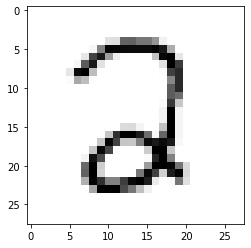

In [5]:
#hide
import mnist


train_images = mnist.train_images()
train_labels = mnist.train_labels()


train_images.shape, train_labels.shape

test_images = mnist.test_images()
test_labels = mnist.test_labels()

test_images.shape, test_labels.shape

image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]



#We normalize the pizel values in the 0 to 1 range

X_train = X_train/255.
X_test = X_test/255.

#And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

X_train.shape, X_test.shape

#We reshape the data to flatten the image pixels into a set of features or co-variates:

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

In [17]:
#hide
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import ClfCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid, Tanh, Relu
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50


first = [Affine("first_affine", 784, 100), Relu("first")]
second = [Affine("second_affine", 100, 100), Relu("second")]
embedding = [Affine("embedding", 100, 2)]
final = [Affine("final_affine", 2, 1), Sigmoid("final")]

layers = first + second + embedding + final
model = Model(layers)

xavier
xavier
xavier
xavier


In [18]:
#hide_input
overview = '''
<!-- #######  HTML!! #########-->
<h3> The neural networks output:</h3>
'''
html = HTML(overview.format())

display(html)

In [19]:
#hide_input
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

learner = Learner(loss, model, opt, config.num_epochs)
acc = ClfCallback(learner, config.bs)
learner.set_callbacks([acc])

learner.train_loop(dl, X_train,y_train,X_test,y_test);


Epoch 0 Loss 0.23292708386477298
Training Accuracy 73.67718244032716% Testing Accuracy 75.60483870967742%
Epoch 10 Loss 0.08145190516473118
Training Accuracy 92.17993657152395% Testing Accuracy 93.69959677419355%
Epoch 20 Loss 0.05324657875344647
Training Accuracy 94.37489567684861% Testing Accuracy 95.66532258064517%
Epoch 30 Loss 0.043121052683200316
Training Accuracy 95.26790185277918% Testing Accuracy 96.11895161290323%
Epoch 40 Loss 0.03785657226580135
Training Accuracy 95.76865297946921% Testing Accuracy 96.32056451612904%
Epoch 50 Loss 0.03453833998097511
Training Accuracy 96.05241195126023% Testing Accuracy 96.62298387096774%
Epoch 60 Loss 0.03219413753094807
Training Accuracy 96.22767484560174% Testing Accuracy 96.875%
Epoch 70 Loss 0.0304246284519339
Training Accuracy 96.42797529627775% Testing Accuracy 97.02620967741935%
Epoch 80 Loss 0.028993623881737964
Training Accuracy 96.63662159906526% Testing Accuracy 97.02620967741935%
Epoch 90 Loss 0.02781182408459844
Training Accur

The training accuracy after 250 epochs: 97.92188282423635



The testing accuracy after 250 epochs: 97.42943548387096





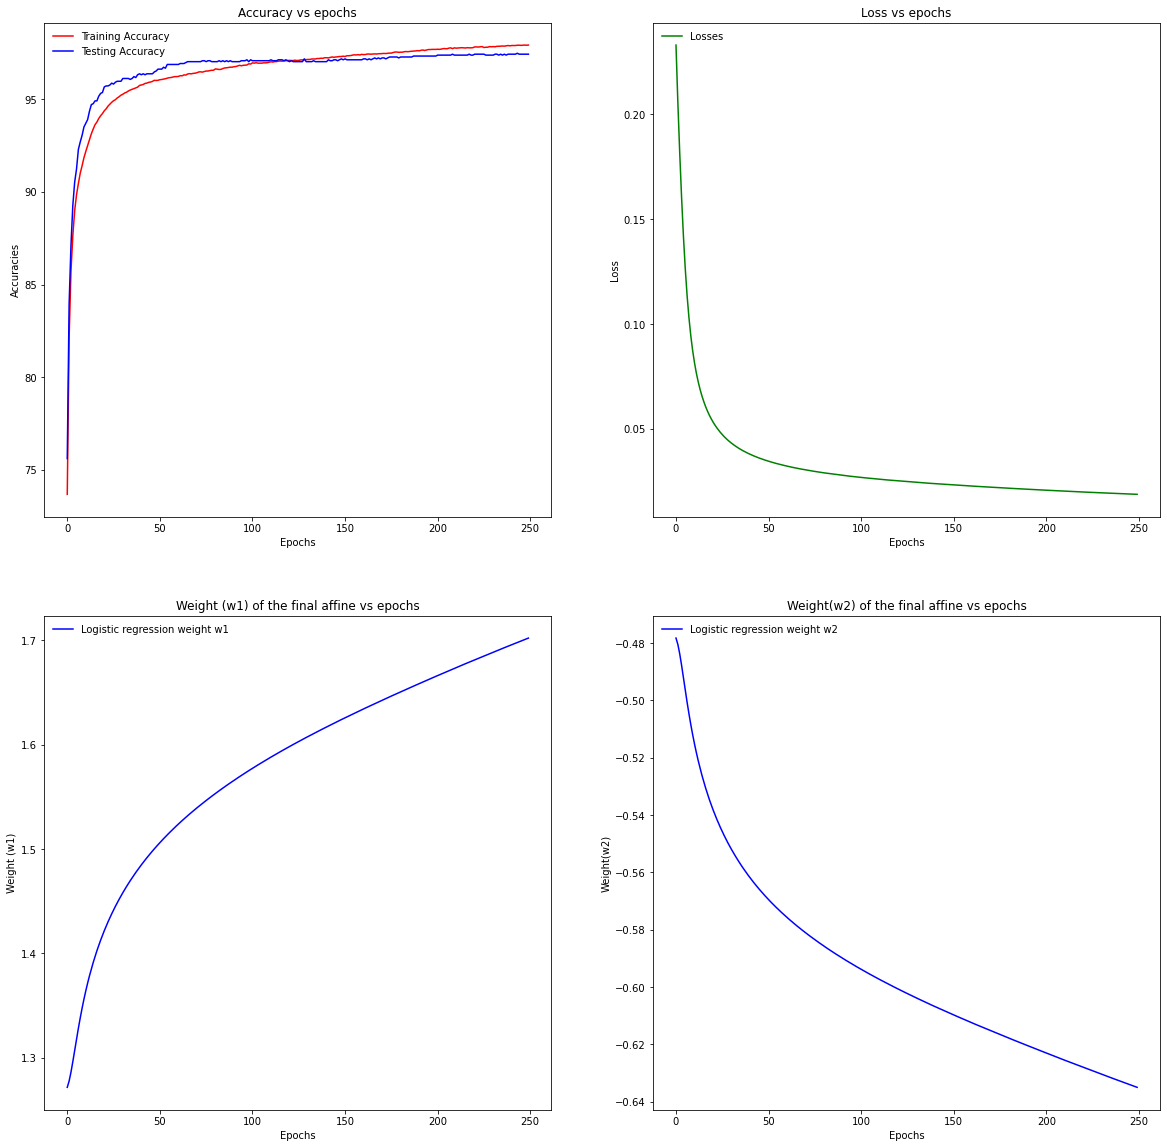

In [20]:
#hide_input
#Plotting the losses and accuracies
print("The training accuracy after 250 epochs:",acc.accuracies[-1])
print("\n\n")
print("The testing accuracy after 250 epochs:",acc.test_accuracies[-1])
print("\n\n")

fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(221)
ax.plot(acc.accuracies,color='red',label="Training Accuracy") #Plotting the training accuracy
ax.plot(acc.test_accuracies,color='blue',label="Testing Accuracy") #Plotting the testing accuracy
ax.set_xlabel("Epochs")
ax.set_ylabel("Accuracies")
ax.set_title("Accuracy vs epochs");
ax.legend(frameon=False, loc='upper left')

ax = fig.add_subplot(222)
ax.plot(acc.losses,color='green',label="Losses") #Plotting the losses per epoch
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Loss vs epochs");
ax.legend(frameon=False, loc='upper left');


ax = fig.add_subplot(223)
ax.plot(acc.get_weights('final_affine',0),color='blue',label="Logistic regression weight w1") #Plotting the weights of the final affine per epoch
ax.set_xlabel("Epochs")
ax.set_ylabel("Weight (w1)")
ax.set_title("Weight (w1) of the final affine vs epochs");
ax.legend(frameon=False, loc='upper left');



ax = fig.add_subplot(224)
ax.plot(acc.get_weights('final_affine',1),color='blue',label="Logistic regression weight w2") #Plotting the weights of the final affine per epoch
ax.set_xlabel("Epochs")
ax.set_ylabel("Weight(w2)")
ax.set_title("Weight(w2) of the final affine vs epochs");
ax.legend(frameon=False, loc='upper left');






In [21]:
#hide_input
overview = '''
<!-- #######  HTML!! #########-->
<p>Here we see that the model has been trained for 250 epochs and the respective losses as well as the training and 
testing accuracies are printed for every 10 epochs. A batch size of 50 was emplyed with a learning rate of 0.001.
As there is no regularization the model has overfit the causing the training 
accuracy to exceed and continuously diverge away from the testing accuracy. The progression of both the losses and the weights 
are smooth as the number of epochs increases. The testing accuracy is not smooth as the data is smaller causing the accuracy to vary
depending on the samples used for testing. </p>
'''
html = HTML(overview.format())

display(html)

Printing the classification report for the test data:
              precision    recall  f1-score   support

     class 3       0.97      0.97      0.97       974
     class 8       0.98      0.97      0.97      1010

    accuracy                           0.97      1984
   macro avg       0.97      0.97      0.97      1984
weighted avg       0.97      0.97      0.97      1984

True Positive: 949
False Negative: 25
False Positive: 26
True Negative: 984





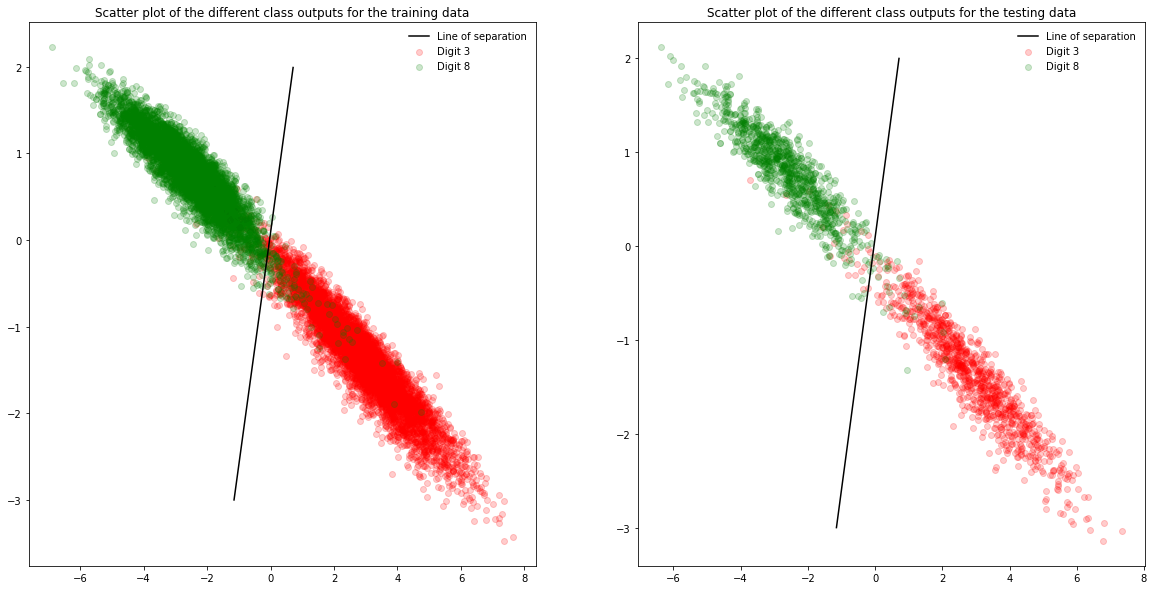

In [23]:
#hide_input
from sympy import *

pred_test=model(X_test) #Predictions of the model for the test data after 250 epochs
pred_test= 1*(pred_test>=0.5)
pred_train=model(X_train) #Predictions of the model for the train data after 250 epochs
pred_train= 1*(pred_train>=0.5)

#Printing the classification report for the test data
print("Printing the classification report for the test data:")
print(classification_report(y_test, pred_test, target_names=['class 3', 'class 8']))
print("True Positive:",confusion_matrix(y_test, pred_test)[0][0])
print("False Negative:",confusion_matrix(y_test, pred_test)[0][1])
print("False Positive:",confusion_matrix(y_test, pred_test)[1][0])
print("True Negative:",confusion_matrix(y_test, pred_test)[1][1])
print("\n\n")

#I have defined a model.out_layer in model.py to give the output of each layer

#Getting the output of the embedding layer for the training data
Embed_layer_train=model.out_layer(X_train,5)

#Finding the weights and bias of the affine layer after the embedding layer
w1=acc.get_weights("final_affine",0)[-1]
w2=acc.get_weights("final_affine",1)[-1]
b=acc.get_biases("final_affine")[-1]

#Arranging the outputs of the embedding layer for the training data in terms of its class
y_train=y_train.reshape(-1,1)
index_3=np.where(y_train==1)[0]
index_8=np.where(y_train==0)[0]
clas_3_X=[]
clas_3_Y=[]
clas_8_X=[]
clas_8_Y=[]
[clas_3_X.append(Embed_layer_train[i][0]) for i in index_3]
[clas_3_Y.append(Embed_layer_train[i][1]) for i in index_3]
[clas_8_X.append(Embed_layer_train[i][0]) for i in index_8]
[clas_8_Y.append(Embed_layer_train[i][1]) for i in index_8]


#Creating symbols
x,y=symbols('x y')

#Solving for the line w1.x+w2.y+b=0
Line=w1*x+w2*y+b
L=solve(Line)

#Substituting the values of y in a range to get the line
Y=np.arange(-3,2,0.01)
X=[L[0][x].subs(y,i) for i in Y]


fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(121)
ax.scatter(clas_3_X,clas_3_Y,color='red',label="Digit 3", alpha=0.2) #Plotting the training accuracy
ax.scatter(clas_8_X,clas_8_Y,color='green',label="Digit 8",alpha=0.2) #Plotting the testing accuracy
ax.plot(X,Y,color='black',label="Line of separation")
ax.set_title("Scatter plot of the different class outputs for the training data");
ax.legend(frameon=False, loc='upper right')


#Arranging the outputs of the embedding layer for the testing data in terms of its class
Embed_layer_test=model.out_layer(X_test,5)
y_test=y_test.reshape(-1,1)
index_3=np.where(y_test==1)[0]
index_8=np.where(y_test==0)[0]
clas_3_X=[]
clas_3_Y=[]
clas_8_X=[]
clas_8_Y=[]
[clas_3_X.append(Embed_layer_test[i][0]) for i in index_3]
[clas_3_Y.append(Embed_layer_test[i][1]) for i in index_3]
[clas_8_X.append(Embed_layer_test[i][0]) for i in index_8]
[clas_8_Y.append(Embed_layer_test[i][1]) for i in index_8]


ax = fig.add_subplot(122)
ax.scatter(clas_3_X,clas_3_Y,color='red',label="Digit 3", alpha=0.2) #Plotting the training accuracy
ax.scatter(clas_8_X,clas_8_Y,color='green',label="Digit 8",alpha=0.2) #Plotting the testing accuracy
ax.plot(X,Y,color='black',label="Line of separation")
ax.set_title("Scatter plot of the different class outputs for the testing data");
ax.legend(frameon=False, loc='upper right');





In [24]:
#hide_input
overview = '''
<!-- #######  HTML!! #########-->
<p> Shown above is the plot of the training and testing data points. The different colours indicate the class to which the point 
belongs and we can see that the mis-classification rate is fairly small and the model is going a good job with the classification
as is seen in the classification report as well. The next plot will show the location of the mis-classified points and depending
on the distance of the mis-classified point from the dividing line, we can conclude how many data points fall under the category of
outliers and can be due to noise. We can see that neural networks learn the geometry of data. </p>
'''
html = HTML(overview.format())

display(html)

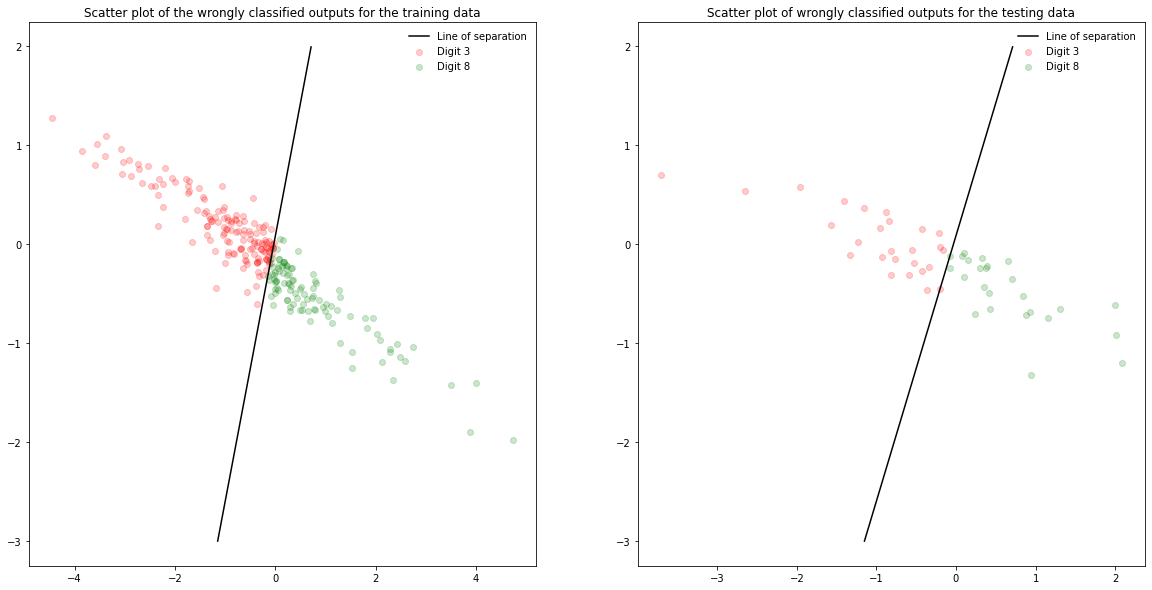

In [25]:
#hide_input
#Getting the output of the model for the testing and training data
pred_tr=model(X_train)
pred_tr= 1*(pred_tr>=0.5)

pred_te= model(X_test)
pred_te= 1*(pred_te>=0.5)


#Arranging the outputs of the embedding layer for the training data in terms of its class
index_3=np.where(y_train==1)[0]
index_8=np.where(y_train==0)[0]
clas_3_X=[]
clas_3_Y=[]
clas_8_X=[]
clas_8_Y=[]
[clas_3_X.append(Embed_layer_train[i][0]) for i in index_3 if(pred_tr[i]==0)]
[clas_3_Y.append(Embed_layer_train[i][1]) for i in index_3 if(pred_tr[i]==0)]
[clas_8_X.append(Embed_layer_train[i][0]) for i in index_8 if(pred_tr[i]==1)]
[clas_8_Y.append(Embed_layer_train[i][1]) for i in index_8 if(pred_tr[i]==1)]


fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(121)
ax.scatter(clas_3_X,clas_3_Y,color='red',label="Digit 3", alpha=0.2) #Plotting the training accuracy
ax.scatter(clas_8_X,clas_8_Y,color='green',label="Digit 8",alpha=0.2) #Plotting the testing accuracy
ax.plot(X,Y,color='black',label="Line of separation")
ax.set_title("Scatter plot of the wrongly classified outputs for the training data");
ax.legend(frameon=False, loc='upper right')


index_3=np.where(y_test==1)[0]
index_8=np.where(y_test==0)[0]
clas_3_X=[]
clas_3_Y=[]
clas_8_X=[]
clas_8_Y=[]
[clas_3_X.append(Embed_layer_test[i][0]) for i in index_3 if(pred_te[i]==0)]
[clas_3_Y.append(Embed_layer_test[i][1]) for i in index_3 if(pred_te[i]==0)]
[clas_8_X.append(Embed_layer_test[i][0]) for i in index_8 if(pred_te[i]==1)]
[clas_8_Y.append(Embed_layer_test[i][1]) for i in index_8 if(pred_te[i]==1)]

ax = fig.add_subplot(122)
ax.scatter(clas_3_X,clas_3_Y,color='red',label="Digit 3", alpha=0.2) #Plotting the training accuracy
ax.scatter(clas_8_X,clas_8_Y,color='green',label="Digit 8",alpha=0.2) #Plotting the testing accuracy
ax.plot(X,Y,color='black',label="Line of separation")
ax.set_title("Scatter plot of wrongly classified outputs for the testing data");
ax.legend(frameon=False, loc='upper right');

In [26]:
#hide
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 500
config.bs = 50


first = [Affine("affine", 784, 1),  Sigmoid("final")]

layers = first
model = Model(layers)


xavier


In [27]:
#hide_input

overview = '''
<!-- #######  HTML!! #########-->
<h3> The Logistic regression output:</h3>
'''
html = HTML(overview.format())

display(html)

In [28]:
#hide_input
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

learner = Learner(loss, model, opt, config.num_epochs)
acc = ClfCallback(learner, config.bs)
learner.set_callbacks([acc])

learner.train_loop(dl, X_train,y_train,X_test,y_test);


Epoch 0 Loss 0.20885822107462557
Training Accuracy 74.90402270071775% Testing Accuracy 74.14314516129032%
Epoch 10 Loss 0.10234292046939966
Training Accuracy 90.31046569854783% Testing Accuracy 90.82661290322581%
Epoch 20 Loss 0.0787877153906652
Training Accuracy 92.76414621932899% Testing Accuracy 93.54838709677419%
Epoch 30 Loss 0.06771102221674714
Training Accuracy 93.74061091637456% Testing Accuracy 94.65725806451613%
Epoch 40 Loss 0.0610768484431798
Training Accuracy 94.18294107828409% Testing Accuracy 95.16129032258065%
Epoch 50 Loss 0.05658796238587991
Training Accuracy 94.46670005007512% Testing Accuracy 95.46370967741935%
Epoch 60 Loss 0.05331138502532962
Training Accuracy 94.74211316975463% Testing Accuracy 95.71572580645162%
Epoch 70 Loss 0.05079275454653302
Training Accuracy 94.95910532465365% Testing Accuracy 95.86693548387096%
Epoch 80 Loss 0.048780308019329185
Training Accuracy 95.10933066266067% Testing Accuracy 95.96774193548387%
Epoch 90 Loss 0.0471269276978032
Traini

The training accuracy after 500 epochs: 96.56985478217325



The testing accuracy after 500 epochs: 96.82459677419355





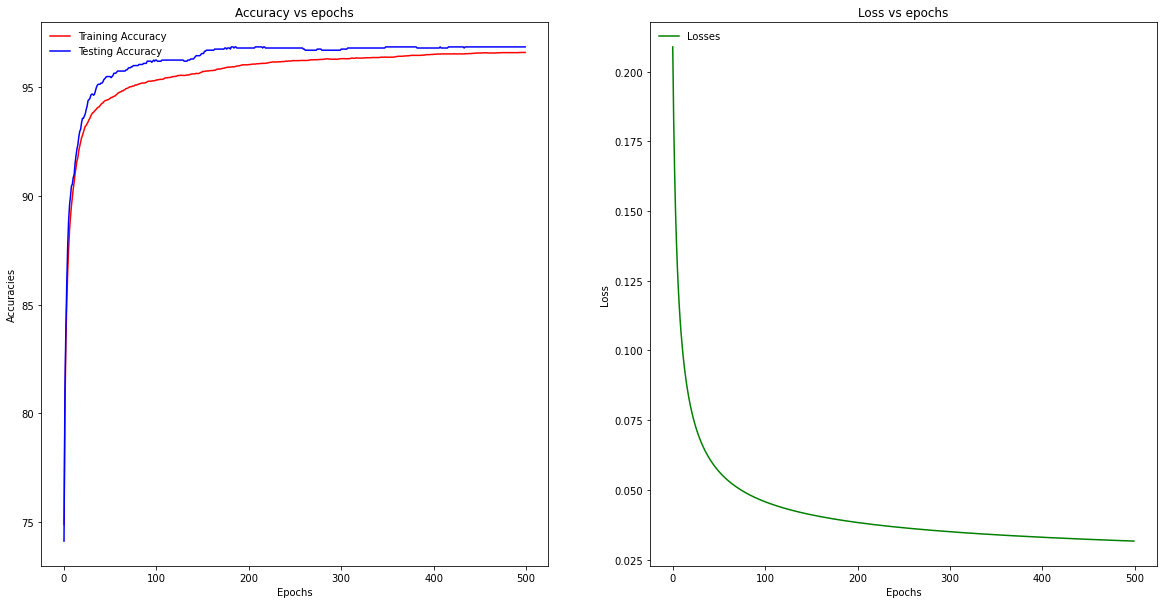

In [29]:
#hide_input
#Plotting the losses and accuracies
print("The training accuracy after 500 epochs:",acc.accuracies[-1])
print("\n\n")
print("The testing accuracy after 500 epochs:",acc.test_accuracies[-1])
print("\n\n")

fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(121)
ax.plot(acc.accuracies,color='red',label="Training Accuracy") #Plotting the training accuracy
ax.plot(acc.test_accuracies,color='blue',label="Testing Accuracy") #Plotting the testing accuracy
ax.set_xlabel("Epochs")
ax.set_ylabel("Accuracies")
ax.set_title("Accuracy vs epochs");
ax.legend(frameon=False, loc='upper left')

ax = fig.add_subplot(122)
ax.plot(acc.losses,color='green',label="Losses") #Plotting the losses per epoch
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Loss vs epochs");
ax.legend(frameon=False, loc='upper left');



In [30]:
#hide_input
overview = '''
<!-- #######  HTML!! #########-->
<p>Here we see that the model has been trained for 500 epochs and with the same parameters as before, the model 
is not able to reach the accuracy that was got by the neural network, both the accuracies are lower than that of the neural network even though the number of 
epochs are twice as high. This is because the number of a layers are not sufficient. There is no embedding layer and thus have to be visualized in a different manner.</p>
'''
html = HTML(overview.format())

display(html)

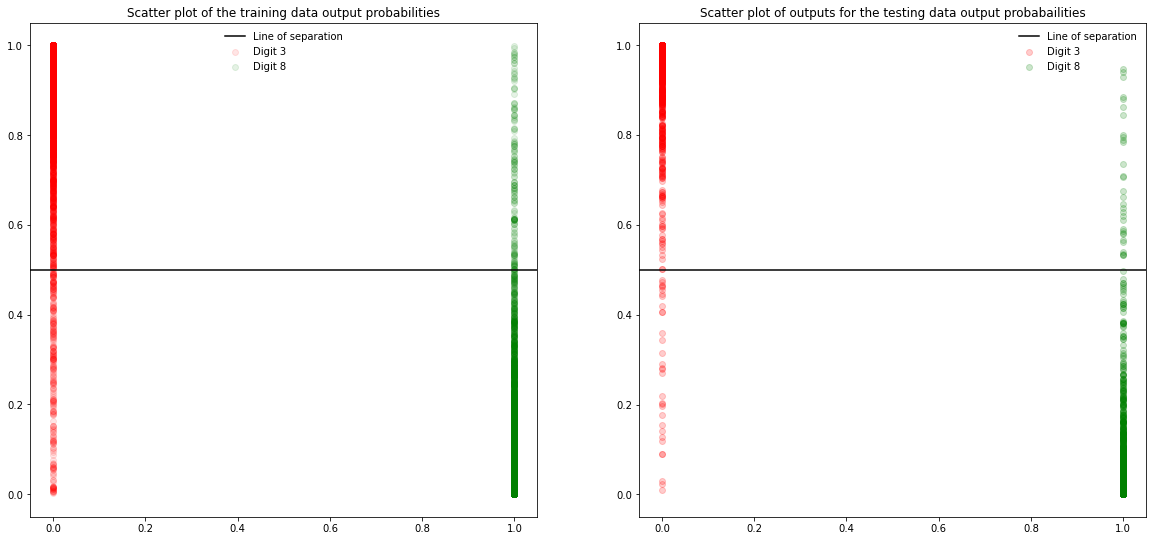

In [31]:
#hide_input
#Getting the output of the model for the testing and training data
pred_tr=model(X_train)
pred_te= model(X_test)


#Arranging the outputs of the embedding layer for the training data in terms of its class
index_3=np.where(y_train==1)[0]
index_8=np.where(y_train==0)[0]

clas_3_Y=[]
clas_8_Y=[]
[clas_3_Y.append(pred_tr[i]) for i in index_3]
clas_3_X=np.zeros(len(clas_3_Y))
[clas_8_Y.append(pred_tr[i]) for i in index_8]
clas_8_X=np.ones(len(clas_8_Y))


fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(221)
ax.scatter(clas_3_X,clas_3_Y,color='red',label="Digit 3", alpha=0.1) #Plotting the training accuracy
ax.scatter(clas_8_X,clas_8_Y,color='green',label="Digit 8",alpha=0.1) #Plotting the testing accuracy
ax.axhline(0.5,0,1,color='black',label="Line of separation")
ax.set_title("Scatter plot of the training data output probabilities");
ax.legend(frameon=False, loc='upper center')


index_3=np.where(y_test==1)[0]
index_8=np.where(y_test==0)[0]

clas_3_Y=[]
clas_8_Y=[]

[clas_3_Y.append(pred_te[i]) for i in index_3]
clas_3_X=np.zeros(len(clas_3_Y))
[clas_8_Y.append(pred_te[i]) for i in index_8]
clas_8_X=np.ones(len(clas_8_Y))

ax = fig.add_subplot(222)
ax.scatter(clas_3_X,clas_3_Y,color='red',label="Digit 3", alpha=0.2) #Plotting the training accuracy
ax.scatter(clas_8_X,clas_8_Y,color='green',label="Digit 8",alpha=0.2) #Plotting the testing accuracy
ax.axhline(0.5,0,1,color='black',label="Line of separation")
ax.set_title("Scatter plot of outputs for the testing data output probabailities");
ax.legend(frameon=False, loc='upper right');


In [32]:
#hide_input
overview = '''
<!-- #######  HTML!! #########-->
<p>The different classes are again plotted in different colours. We can see that the classification is again 
not as good as neural networks as indicated by the number of green dots above the 0.5 line and number of red dots below the 0.5 line.
The x-axis is not of importance and the two classes were separated out for easy visualization.</p>
'''
html = HTML(overview.format())

display(html)